In [98]:
import urllib2
import pandas as pd
import re
import matplotlib
import json
from bs4 import BeautifulSoup as Soup
from snownlp import SnowNLP
import time
from pymongo import MongoClient
pd.options.display.max_colwidth = 100
import numpy as np

In [2]:
# response = urllib2.urlopen('https://bbs.ngacn.cc/thread.php?fid=-7&page=1&lite=xml')
# soup = Soup(response, 'lxml-xml')

# Connect to MongoDB

In [3]:
client = MongoClient('10.65.26.66', 27017, username='superhktds',password='HKThkt123',authSource='admin',authMechanism='SCRAM-SHA-1')
db_name = 'nga_2018'
db = client[db_name]
collection_useraction = db['useraction']

In [4]:
curser = db.nga_2018.find({})

In [5]:
df = pd.DataFrame(list(curser))

# 抓取8k+帖子， 100k+回复

In [6]:
opener = urllib2.build_opener()
opener.addheaders.append(('Cookie', '__utma=240585808.1647950274.1493176825.1501557294.1501563204.128; UM_distinctid=15f5197dfcb74d-03e107c3e4155-3a3e5e06-1fa400-15f5197dfccb86; CNZZDATA1264400273=581996257-1512720390-https%253A%252F%252Fweb.wechat.com%252F%7C1512720390; CNZZDATA1256638924=386043101-1493358985-https%253A%252F%252Fbbs.ngacn.cc%252F%7C1513557619; CNZZDATA1256638919=1774706182-1503030389-https%253A%252F%252Fbbs.ngacn.cc%252F%7C1515374600; CNZZDATA1256638935=856131897-1495096681-https%253A%252F%252Fbbs.ngacn.cc%252F%7C1517300476; bbsmisccookies=%7B%7D; taihe=9fb395a5f86a7bd1b896ed9a444ac540; ngacn0comUserInfo=wllfox%09wllfox%0939%0939%09%0914%0977664%094%090%09347%2C341%2C262%2C214%2C207%2C75%093_45%2C4_15%2C16_15%2C31_4%2C22_1280%2C12_30%2C77_75%2C61_2%2C91_30; CNZZDATA1256638943=29216387-1493343407-https%253A%252F%252Fbbs.ngacn.cc%252F%7C1520576491; CNZZDATA1262314555=226700705-1514443872-https%253A%252F%252Fbbs.ngacn.cc%252F%7C1521182844; ngaPassportUid=17747039; ngaPassportUrlencodedUname=wllfox; ngaPassportCid=Z8dperkpfc8f6eklcko44gq5d6fk7tq8rrh0f024; CNZZDATA1256638851=962096524-1493178972-https%253A%252F%252Fbbs.ngacn.cc%252F%7C1523579711; CNZZDATA1256638828=1904417898-1493342971-https%253A%252F%252Fbbs.ngacn.cc%252F%7C1523610037; CNZZDATA1256638858=1643246750-1493344248-https%253A%252F%252Fbbs.ngacn.cc%252F%7C1523612967; Hm_lvt_5adc78329e14807f050ce131992ae69b=1523849824; ngacn0comUserInfoCheck=c56634639c5e6f6e684a45492860d932; ngacn0comInfoCheckTime=1523868472; CNZZDATA1256638820=1611885119-1493172925-https%253A%252F%252Fbbs.ngacn.cc%252F%7C1523865039; CNZZDATA30043604=cnzz_eid%3D1757245345-1493176111-null%26ntime%3D1523864396; CNZZDATA30039253=cnzz_eid%3D567575914-1493172144-null%26ntime%3D1523864677; lastvisit=1523868828; lastpath=/read.php?tid=13875294&_ff=-7; Hm_lpvt_5adc78329e14807f050ce131992ae69b=1523868830'))
tid_lis = []

In [7]:
for i in range(1, 251):
    try:
        response = opener.open("https://bbs.ngacn.cc/thread.php?fid=-7&page={}&lite=xml".format(str(i)))
        soup = Soup(response, 'lxml-xml')
        new = [str(w)[5:13] for w in soup.find_all('tid')]
        tid_lis += new
        print 'added {} tids'.format(len(new))
        time.sleep(1)
    except:
        pass

added 41 tids
added 39 tids
added 35 tids
added 34 tids
added 35 tids
added 35 tids
added 35 tids
added 42 tids
added 34 tids
added 34 tids
added 35 tids
added 35 tids
added 34 tids
added 35 tids
added 35 tids
added 35 tids
added 35 tids
added 33 tids
added 34 tids
added 35 tids
added 34 tids
added 33 tids
added 35 tids
added 34 tids
added 35 tids
added 34 tids
added 35 tids
added 34 tids
added 35 tids
added 35 tids
added 34 tids
added 33 tids
added 35 tids
added 32 tids
added 35 tids
added 34 tids
added 34 tids
added 35 tids
added 35 tids
added 34 tids
added 33 tids
added 32 tids
added 34 tids
added 34 tids
added 35 tids
added 34 tids
added 34 tids
added 34 tids
added 33 tids
added 35 tids
added 34 tids
added 34 tids
added 33 tids
added 32 tids
added 33 tids
added 33 tids
added 33 tids
added 33 tids
added 35 tids
added 34 tids
added 33 tids
added 35 tids
added 31 tids
added 29 tids
added 32 tids
added 34 tids
added 35 tids
added 35 tids
added 34 tids
added 32 tids
added 33 tids
added 

In [8]:
df_tid = pd.DataFrame({'tid':tid_lis})

In [9]:
df_tid.to_csv('tid_new.csv', index = False)

In [10]:
df_tid = pd.read_csv('tid_new.csv', dtype = object)

In [11]:
tid_lis = df_tid.tid.tolist()

In [12]:
len(tid_lis)

8391

In [ ]:
i = 0
for tid in tid_lis:
    try:
        response1 = opener.open("https://bbs.ngacn.cc/read.php?tid={}&page=1&lite=xml&v2".format(tid))
        soup = Soup(response1, 'lxml-xml')
        item_lis = soup.find_all('item')
        for w in item_lis:
            if (w.find('content') is not None) and (w.find('authorid') is not None):
                device = None
                date = w.find('postdate').get_text()
                content = w.find('content').get_text()
                uid = w.find('authorid').get_text()
                if w.find('from_client') is not None:
                    device = w.find('from_client').get_text()
                for v in item_lis:
                    if (v.find('uid') is not None) and (v.find('uid').get_text() == w.find('authorid').get_text()):
                        username = v.find('username').get_text()
                        db.nga_2018.insert_one({'username':username, 'uid':uid, 'content':content,'date':date, 'device':device})
                        i += 1
                        print '{}th record is added'.format(str(i))
        time.sleep(1)
    except:
        pass
#df.to_csv('result.csv', index=False)

1th record is added
2th record is added
3th record is added
4th record is added
5th record is added
6th record is added
7th record is added
8th record is added
9th record is added
10th record is added
11th record is added
12th record is added
13th record is added
14th record is added
15th record is added
16th record is added
17th record is added
18th record is added
19th record is added
20th record is added
21th record is added
22th record is added
23th record is added
24th record is added
25th record is added
26th record is added
27th record is added
28th record is added
29th record is added
30th record is added
31th record is added
32th record is added
33th record is added
34th record is added
35th record is added
36th record is added
37th record is added
38th record is added
39th record is added
40th record is added
41th record is added
42th record is added
43th record is added
44th record is added
45th record is added
46th record is added
47th record is added
48th record is added
4

# Preprocessing

In [6]:
df['ac'] = df['content'].str.findall('\[s\:a.{0,10}\]')

In [7]:
df.ac.apply(len)

0         0
1         0
2         1
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        1
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        1
25        0
26        0
27        0
28        0
29        0
         ..
124935    1
124936    0
124937    0
124938    1
124939    0
124940    0
124941    0
124942    0
124943    0
124944    1
124945    0
124946    0
124947    0
124948    0
124949    0
124950    0
124951    0
124952    0
124953    0
124954    0
124955    0
124956    0
124957    0
124958    0
124959    0
124960    0
124961    0
124962    0
124963    0
124964    0
Name: ac, dtype: int64

In [8]:
df['content_cleaned'] = df.content.str.replace(u'\[flash.+\/flash\]', '').str.replace('<br/>','').str.replace(u'\[b\]Reply.+\[\/b\]','')\
  .str.replace(u'\[quote\].+\[\/quote\]','').str.replace(u'\[url\].+\[\/url\]','').str.replace(u'\[s\:a.{0,10}\]','')\
  .str.replace(u'\[img\].+\[\/img\]','')

In [9]:
df

_id  \
0       5ad471081f4d4ffe29c575c8   
1       5ad4710a1f4d4ffe29c575c9   
2       5ad4710a1f4d4ffe29c575ca   
3       5ad4710a1f4d4ffe29c575cb   
4       5ad4710a1f4d4ffe29c575cc   
5       5ad4710a1f4d4ffe29c575cd   
6       5ad4710a1f4d4ffe29c575ce   
7       5ad4710a1f4d4ffe29c575cf   
8       5ad4710a1f4d4ffe29c575d0   
9       5ad4710a1f4d4ffe29c575d1   
10      5ad4710a1f4d4ffe29c575d2   
11      5ad4710a1f4d4ffe29c575d3   
12      5ad4710a1f4d4ffe29c575d4   
13      5ad4710a1f4d4ffe29c575d5   
14      5ad4710a1f4d4ffe29c575d6   
15      5ad4710a1f4d4ffe29c575d7   
16      5ad4710a1f4d4ffe29c575d8   
17      5ad4710a1f4d4ffe29c575d9   
18      5ad4710a1f4d4ffe29c575da   
19      5ad4710a1f4d4ffe29c575db   
20      5ad4710a1f4d4ffe29c575dc   
21      5ad471101f4d4ffe29c575dd   
22      5ad471101f4d4ffe29c575de   
23      5ad471101f4d4ffe29c575df   
24      5ad471101f4d4ffe29c575e0   
25      5ad471101f4d4ffe29c575e1   
26      5ad471101f4d4ffe29c575e2   
27      5ad471101f4d4ffe29c575e3   
28      5ad471101f4d4ffe29c575e4   
29      5ad471101f4d4ffe29c575e5   
...                          ...   
124935  5ad4f0181f4d4ffe29c75dcf   
124936  5ad4f0181f4d4ffe29c75dd0   
124937  5ad4f0181f4d4ffe29c75dd1   
124938  5ad4f01a1f4d4ffe29c75dd2   
124939  5ad4f01a1f4d4ffe29c75dd3   
124940  5ad4f01a1f4d4ffe29c75dd4   
124941  5ad4f01a1f4d4ffe29c75dd5   
124942  5ad4f01a1f4d4ffe29c75dd6   
124943  5ad4f01a1f4d4ffe29c75dd7   
124944  5ad4f01a1f4d4ffe29c75dd8   
124945  5ad4f01a1f4d4ffe29c75dd9   
124946  5ad4f01a1f4d4ffe29c75dda   
124947  5ad4f01a1f4d4ffe29c75ddb   
124948  5ad4f01a1f4d4ffe29c75ddc   
124949  5ad4f01a1f4d4ffe29c75ddd   
124950  5ad4f01a1f4d4ffe29c75dde   
124951  5ad4f01a1f4d4ffe29c75ddf   
124952  5ad4f01a1f4d4ffe29c75de0   
124953  5ad4f01a1f4d4ffe29c75de1   
124954  5ad4f01a1f4d4ffe29c75de2   
124955  5ad4f01a1f4d4ffe29c75de3   
124956  5ad4f01a1f4d4ffe29c75de4   
124957  5ad4f01a1f4d4ffe29c75de5   
124958  5ad4f01a1f4d4ffe29c75de6   
124959  5ad4f01a1f4d4ffe29c75de7   
124960  5ad4f01a1f4d4ffe29c75de8   
124961  5ad4f01a1f4d4ffe29c75de9   
124962  5ad4f01a1f4d4ffe29c75dea   
124963  5ad4f0201f4d4ffe29c75deb   
124964  5ad4f0201f4d4ffe29c75dec   

                                                                                                    content  \
0                                                                                                             
1                   你游戏手机再牛逼，CPU最多最多也就和其他人旗舰机一样，并不能像PC一样真正的发烧起来。而且现在的科技水平，手机上还是停留在“小游戏”的阶段，大部分游戏普通手机都能满足需求。   
2                                                               手机性能是差不多<br/><br/>差别都在屏幕，摄像，续航，外观了[s:ac:嘲笑]   
3                                                                                  游戏机和pc比，硬件还更差，没专属内容才是大问题   
4                                                           游戏手机和掌机一样，平台才是关键，参考NS。8P公认最强游戏手机，ios平台优势也要记一功的。   
5                                                                                                没有游戏说啥都没用。   
6                                                                             游戏手机从性能上说不就是旗舰、次旗舰吗，再就是上面说的平台   
7                                                                                              要独占游戏还要开发系统吧   
8                                                         手游的主流是网游不是单机，网游还需要和大量的人一起玩才有意思的，起码得适配出货量最大的那些主流机型   
9                           最尴尬的还是手机游戏不想自己作死最好还是老老实实开发王者荣耀这种多数机器能跑的游戏，开发少数游戏手机才能跑的游戏，给谁玩？<br/>所以游戏手机基本就是智商税   
10                                  手机游戏独占？疯了吧，手机游戏不是以方便随时随地可以玩著称吗？<br/>这特么要是独占了，合着我出门兜儿里还揣2-3个手机？不然我还玩不到吗？   
11                              游戏手机，拍照手机，自拍美颜手机，老人机 …… <br/><br/>这些都是手机功能化上的细分，营销上的定向投放，你觉得没用，说明你不是目标用户而已。   
12                                                                                   我跟关注那个手柄，不知道能不能用在其他手机上   
13                                                                                    10楼正解，玩的是噱头，精英都比较理智。。   
14                                 游戏手机就是长续航，高性能就行了<br/><br/>别的不重要。<br/><br/>然而这两者，都不是一个新兴手机厂商能做好的[s:ac:哭笑]   
15      [b]Reply to 

In [10]:
df['ac_count'] = df.ac.apply(len)

In [67]:
df.device.value_counts()

7 iPhone X(iOS 11.3)                     4585
8 Xiaomi MI 6(Android 8.0.0)             3429
7 iPhone 6S(iOS 11.3)                    3405
7 iPhone 7P(iOS 11.3)                    2796
7 iPhone 7(iOS 11.3)                     2433
7 iPhone 8P(iOS 11.3)                    2221
8 Xiaomi MIX 2(Android 8.0.0)            1981
7 iPhone 6SP(iOS 11.3)                   1905
8 HUAWEI MHA-AL00(Android 8.0.0)         1711
7 iPhone 6(iOS 11.3)                     1448
101 iPhone                               1220
7 iPhone 6P(iOS 11.3)                    1198
8 Xiaomi Redmi Note 4X(Android 7.0)      1164
7 iPhone 8(iOS 11.3)                     1064
8 HUAWEI ALP-AL00(Android 8.0.0)          986
8 samsung SM-N9500(Android 7.1.1)         981
8 Xiaomi Mi Note 3(Android 7.1.1)         969
8 samsung SM-G9350(Android 7.0)           871
8 HUAWEI HUAWEI NXT-AL10(Android 7.0)     836
8 Xiaomi MI 5(Android 7.0)                834
7 iPhone 6S(iOS 10.3.3)                   758
8 Xiaomi MI MAX 2(Android 7.1.1)  

# 机型

In [12]:
df[df.device.notnull()][df[df.device.notnull()].device.str.contains('HUAWEI')].count()

_id                14250
content            14250
date               14250
device             14250
uid                14250
username           14250
ac                 14250
content_cleaned    14250
ac_count           14250
dtype: int64

In [13]:
def extract_brand(st):
    brand_lis = ['iPhone', 'Xiaomi', 'samsung', 'OnePlus', 'HUAWEI', 'smartisan', 'Meizu', 'ZTE', 'OPPO', 'VIVO', 'LG']
    if st == 'NA':
        return 'NA'
    for w in brand_lis:
        if w in st:
            return w
    return 'other'

In [14]:
df['brand']=df.device.fillna('NA').apply(extract_brand)

In [15]:
df.brand.value_counts()

iPhone       39207
NA           32213
Xiaomi       17802
HUAWEI       14250
other         8716
samsung       6263
Meizu         2448
OnePlus       1711
OPPO          1279
smartisan      860
LG             130
ZTE             80
VIVO             6
Name: brand, dtype: int64

# Sentiment

In [16]:
def sen_score(st):
    try:
        s = SnowNLP(st)
        return s.sentiments
    except:
        return None

In [17]:
df['sentiment_score'] = df.content_cleaned.apply(sen_score)

In [19]:
df[df.sentiment_score <0.09]

_id  \
3       5ad4710a1f4d4ffe29c575cb   
22      5ad471101f4d4ffe29c575de   
30      5ad471101f4d4ffe29c575e6   
37      5ad471101f4d4ffe29c575ed   
41      5ad471101f4d4ffe29c575f1   
48      5ad471111f4d4ffe29c575f8   
49      5ad471111f4d4ffe29c575f9   
59      5ad471121f4d4ffe29c57603   
62      5ad471121f4d4ffe29c57606   
90      5ad471191f4d4ffe29c57622   
125     5ad471211f4d4ffe29c57645   
128     5ad471211f4d4ffe29c57648   
129     5ad471211f4d4ffe29c57649   
130     5ad471211f4d4ffe29c5764a   
131     5ad471211f4d4ffe29c5764b   
132     5ad471211f4d4ffe29c5764c   
133     5ad471211f4d4ffe29c5764d   
137     5ad471211f4d4ffe29c57651   
139     5ad471211f4d4ffe29c57653   
140     5ad471211f4d4ffe29c57654   
143     5ad471211f4d4ffe29c57657   
144     5ad471211f4d4ffe29c57658   
145     5ad471271f4d4ffe29c57659   
149     5ad471271f4d4ffe29c5765d   
155     5ad471271f4d4ffe29c57663   
156     5ad471271f4d4ffe29c57664   
163     5ad471271f4d4ffe29c5766b   
164     5ad471271f4d4ffe29c5766c   
166     5ad471271f4d4ffe29c5766e   
168     5ad471291f4d4ffe29c57670   
...                          ...   
124777  5ad4efec1f4d4ffe29c75d31   
124824  5ad4eff61f4d4ffe29c75d60   
124828  5ad4eff61f4d4ffe29c75d64   
124833  5ad4eff61f4d4ffe29c75d69   
124836  5ad4eff61f4d4ffe29c75d6c   
124838  5ad4eff61f4d4ffe29c75d6e   
124839  5ad4effc1f4d4ffe29c75d6f   
124841  5ad4effc1f4d4ffe29c75d71   
124843  5ad4effc1f4d4ffe29c75d73   
124845  5ad4effc1f4d4ffe29c75d75   
124846  5ad4effc1f4d4ffe29c75d76   
124854  5ad4effd1f4d4ffe29c75d7e   
124866  5ad4effd1f4d4ffe29c75d8a   
124867  5ad4f0031f4d4ffe29c75d8b   
124873  5ad4f0051f4d4ffe29c75d91   
124878  5ad4f0051f4d4ffe29c75d96   
124891  5ad4f0051f4d4ffe29c75da3   
124904  5ad4f00b1f4d4ffe29c75db0   
124905  5ad4f00b1f4d4ffe29c75db1   
124917  5ad4f00c1f4d4ffe29c75dbd   
124921  5ad4f0121f4d4ffe29c75dc1   
124931  5ad4f0181f4d4ffe29c75dcb   
124932  5ad4f0181f4d4ffe29c75dcc   
124933  5ad4f0181f4d4ffe29c75dcd   
124936  5ad4f0181f4d4ffe29c75dd0   
124937  5ad4f0181f4d4ffe29c75dd1   
124949  5ad4f01a1f4d4ffe29c75ddd   
124955  5ad4f01a1f4d4ffe29c75de3   
124956  5ad4f01a1f4d4ffe29c75de4   
124959  5ad4f01a1f4d4ffe29c75de7   

                                                                                                    content  \
3                                                                                  游戏机和pc比，硬件还更差，没专属内容才是大问题   
22      [b]Reply to [tid=13874914]Topic[/tid] Post by [uid=38458066]跳海鱼[/uid] (2018-04-16 15:47)[/b]<br/...   
30                                                   我就是啊，可乐每天最少一瓶。结婚之后要么可乐要么每天回去就撕逼就戒了可乐和烟，只是上班的时候偶尔偷偷过下瘾。   
37                                                                               谁发一张，老奶奶每天都喝可乐，劝她的医生全死了那个图   
41                                     绝对会长胖。<br/>我原来一直怎么吃也不胖的。<br/>前两年来，每天晚上可乐或者红牛至少一瓶。<br/>然后肉眼可见的长出了小肚子。   
48                                                                                          这种风格的论坛居然还存在？？？   
49                                                                                           可能一会儿你这个帖子打不开了   
59                                                                                         好慢<br/><br/>网速好慢   
62                                               假ptt<br/>这个是扒过来的。<br/><br/>真ptt你进不去的。而且如果真ptt墙拆了，分分钟服务器炸裂。   
90                                                                                   我们高中同学托福110回来英语高考还没110   
125     兜里还有六块现金，支付宝里五块多，估计明天或后天发工资，应该能撑过去[s:ac:汗]<br/><br/><br/>[img]./mon_201804/16/-7Q5-lcwbZsT3cSve-...   
128                                                                                    明天财务请假了下个月发[s:ac:哭笑]   
129                                                                                      买几个馒头，一餐一个[s:ac:瞎]   
130                                                                 你还有工资发，我们公司3,4,5月的工资要6月发......啊啊啊啊.....   
131     [b]Reply to [pid=272404865,13875195,1]Reply[/pid] Post by [uid=41266324]大户型戒赌吧[/uid] (2018-04-16...   
132     [b]Reply to 

In [23]:
dic = {}
for w in df.ac.tolist():
    if w:
        for v in w:
            if not v in dic:
                dic[v] = 1
            else:
                dic[v] += 1

In [25]:
import operator
sorted_x = sorted(dic.items(), key=operator.itemgetter(1))

In [31]:
for w in sorted_x[-10:]:
    print w[0]

[s:ac:blink]
[s:ac:goodjob]
[s:ac:怕]
[s:ac:花痴]
[s:ac:偷笑]
[s:ac:汗]
[s:ac:愁]
[s:ac:呆]
[s:ac:擦汗]
[s:ac:哭笑]


In [39]:
i = 0
for w in sorted_x:
    i+=w[1]
i

26446

In [313]:
for w in sorted_x[::-1]:
    print w[0],w[1]

[s:ac:哭笑] 4556
[s:ac:擦汗] 2198
[s:ac:呆] 1775
[s:ac:愁] 1645
[s:ac:汗] 1041
[s:ac:偷笑] 778
[s:ac:花痴] 692
[s:ac:怕] 680
[s:ac:goodjob] 676
[s:ac:blink] 665
[s:ac:瞎] 649
[s:ac:心] 604
[s:ac:茶] 563
[s:ac:黑枪] 544
[s:ac:无语] 540
[s:ac:喘] 538
[s:ac:嘲笑1] 464
[s:ac:喷] 440
[s:ac:闪光] 425
[s:ac:嘲笑] 348
[s:ac:晕] 333
[s:ac:哭1] 321
[s:ac:咦] 309
[s:a2:你看看你] 300
[s:ac:惊] 287
[s:ac:反对] 287
[s:ac:上] 268
[s:ac:哭] 254
[s:ac:抠鼻] 224
[s:ac:羞] 184
[s:ac:哼] 181
[s:ac:怒] 173
[s:ac:哦] 173
[s:ac:凌乱] 172
[s:a2:doge] 156
[s:ac:冷] 156
[s:ac:抓狂] 144
[s:ac:计划通] 143
[s:ac:赞同] 139
[s:ac:忧伤] 126
[s:ac:囧] 123
[s:ac:吓] 120
[s:ac:中枪] 114
[s:ac:羡慕] 114
[s:ac:衰] 103
[s:ac:委屈] 91
[s:a2:不明觉厉] 89
[s:a2:认真] 78
[s:a2:偷吃] 70
[s:a2:自戳双目] 64
[s:a2:偷笑] 55
[s:a2:笑] 54
[s:a2:中枪] 53
[s:a2:goodjob] 51
[s:ac:吻] 47
[s:a2:哭] 47
[s:a2:你已经死了] 45
[s:a2:舔] 44
[s:a2:jojo立3] 44
[s:a2:惊] 42
[s:a2:那个…] 37
[s:a2:jojo立2] 36
[s:a2:jojo立] 35
[s:a2:冷笑] 34
[s:a2:干杯] 33
[s:a2:jojo立5] 33
[s:a2:大哭] 30
[s:a2:不活了] 28
[s:a2:是在下输了] 28
[s:a2:冷] 26
[s:a2:恨] 26
[s:a2:诶嘿] 

In [292]:
for w in sorted_x[::-1]:
    if 'a2' in w[0]:
        print w[0],w[1]

[s:a2:你看看你] 300
[s:a2:doge] 156
[s:a2:不明觉厉] 89
[s:a2:认真] 78
[s:a2:偷吃] 70
[s:a2:自戳双目] 64
[s:a2:偷笑] 55
[s:a2:笑] 54
[s:a2:中枪] 53
[s:a2:goodjob] 51
[s:a2:哭] 47
[s:a2:你已经死了] 45
[s:a2:舔] 44
[s:a2:jojo立3] 44
[s:a2:惊] 42
[s:a2:那个…] 37
[s:a2:jojo立2] 36
[s:a2:jojo立] 35
[s:a2:冷笑] 34
[s:a2:干杯] 33
[s:a2:jojo立5] 33
[s:a2:大哭] 30
[s:a2:不活了] 28
[s:a2:是在下输了] 28
[s:a2:冷] 26
[s:a2:恨] 26
[s:a2:诶嘿] 25
[s:a2:干杯2] 24
[s:a2:你这种人…] 24
[s:a2:有何贵干] 22
[s:a2:威吓] 21
[s:a2:怒] 20
[s:a2:你为猴这么] 19
[s:a2:yes] 19
[s:a2:囧2] 18
[s:a2:鬼脸] 17
[s:a2:哦嗬嗬嗬] 14
[s:a2:poi] 13
[s:a2:异议] 11
[s:a2:囧] 11
[s:a2:抢镜头] 11
[s:a2:妮可妮可妮] 9
[s:a2:病娇] 8
[s:a2:lucky] 6
[s:a2:jojo立4] 6
[s:a2:壁咚] 3
[s:a2:干杯][img] 2
[s:a2:干杯][/del] 1
[s:a2:病娇][del] 1
[s:a2:囧2][/del] 1
[s:a2:恨][/b] 1
[s:a2:诶嘿][/del] 1
[s:a2:囧]  [del] 1


In [42]:
df.uid.nunique()

29759

In [61]:
def gen_top10(lis):
    dic = {}
    for w in lis:
        if w:
            for v in w:
                if not v in dic:
                    dic[v] = 1
                else:
                    dic[v] += 1
    sorted_x = sorted(dic.items(), key=operator.itemgetter(1))
    for w in sorted_x[::-1][:10]:
        print w[0], w[1]

In [62]:
gen_top10(df.ac.tolist())

[s:ac:哭笑] 4556
[s:ac:擦汗] 2198
[s:ac:呆] 1775
[s:ac:愁] 1645
[s:ac:汗] 1041
[s:ac:偷笑] 778
[s:ac:花痴] 692
[s:ac:怕] 680
[s:ac:goodjob] 676
[s:ac:blink] 665


In [63]:
gen_top10(df[df.sentiment_score > 0.999].ac.tolist())

[s:ac:哭笑] 186
[s:ac:呆] 88
[s:ac:擦汗] 80
[s:ac:愁] 65
[s:ac:闪光] 48
[s:ac:心] 35
[s:ac:blink] 34
[s:ac:goodjob] 30
[s:ac:喘] 30
[s:ac:怕] 29


In [64]:
gen_top10(df[df.sentiment_score < 0.001].ac.tolist())

[s:ac:哭笑] 180
[s:ac:呆] 118
[s:ac:擦汗] 103
[s:ac:愁] 96
[s:ac:汗] 54
[s:ac:哭] 47
[s:ac:瞎] 37
[s:ac:喷] 35
[s:ac:黑枪] 34
[s:ac:哭1] 32


In [270]:
1.00 * df[df.ac_count>0].uid.nunique() / df.uid.nunique()

0.300010080983904

In [286]:
df.date.max()

u'2018-04-16 22:56'

In [312]:
#根据用户发帖数排列用户名，看看谁是大水比
df.groupby('username').agg({'content':'count'})['content'].reset_index().sort_values('content', ascending = False)[:500].to_csv('test.csv',index=False,encoding='utf-8')

In [186]:
from matplotlib import pyplot as plt
def autopct_more_than_1(pct):
    return ('%1.f%%' % pct) if pct > 1 else ''
def pie_chart(df, col):
    fig = plt.figure(figsize=(12,12))
    group_names = df[col].value_counts().reset_index().sort_values(col, ascending = False)['index']
    #counts = pd.Series(df[col].value_counts().reset_index().sort_values(col, ascending = False)[col].tolist())
    counts = pd.Series(df[col].value_counts().reset_index().sort_values(col, ascending = False)[col].tolist(),index=df[col].value_counts().reset_index()['index'].tolist())

    explode = (0, 0.05, 0.05, 0.1, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8)[:len(df[col].value_counts().reset_index().sort_values(col, ascending = False)[col].tolist())]
    colors = [u'#eaf3fb',
 u'#deebf7',
 u'#d2e3f3',
 u'#c6dbef',
 u'#b2d2e8',
 u'#9dcae1',
 u'#84bcdb',
 u'#6aaed6',
 u'#56a0ce',
 u'#4191c6',
 u'#3181bd',
 u'#2070b4',
 u'#1460a8',
 u'#08509b',
 u'#084082'][::2][:len(df[col].value_counts().reset_index().sort_values(col, ascending = False)[col].tolist())]


    plt.pie(counts,  colors=colors, explode=explode, autopct=autopct_more_than_1)
    
    plt.axis('equal')
    plt.ylabel('')
    plt.legend(labels=counts.index, loc=(-0.05, 0.05), shadow=True)
    #plt.legend(labels=counts.index, loc="best")
    plt.savefig("pie_uid.png".format(col), dpi=500)
    plt.show()

In [86]:
df.to_pickle('nga.pickle')

In [89]:
import wordcloud
import jieba

In [82]:
df['device_cleaned'] = df.device.str.replace(r'\d+ ', '')

In [182]:
df_device = df.replace('NA', np.nan).groupby('uid').agg({'device_cleaned':'max', 'brand':'max'})[['device_cleaned','brand']].reset_index()

In [207]:
df_device.groupby('device_cleaned').agg({'uid':'count'}).reset_index().sort_values(by='uid',ascending=False)[:15]

device_cleaned   uid
1388                 iPhone X(iOS 11.3)  1176
848          Xiaomi MI 6(Android 8.0.0)   939
1215                iPhone 6S(iOS 11.3)   841
1317                iPhone 7P(iOS 11.3)   818
1291                 iPhone 7(iOS 11.3)   787
1347                iPhone 8P(iOS 11.3)   655
1251               iPhone 6SP(iOS 11.3)   594
865         Xiaomi MIX 2(Android 8.0.0)   563
1127                 iPhone 6(iOS 11.3)   478
321      HUAWEI MHA-AL00(Android 8.0.0)   393
1167                iPhone 6P(iOS 11.3)   336
894   Xiaomi Redmi Note 4X(Android 7.0)   315
1685      samsung SM-G9350(Android 7.0)   294
1332                 iPhone 8(iOS 11.3)   272
839            Xiaomi MI 5(Android 7.0)   258

In [240]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

In [265]:
df['device_cleaned'] = df.device_cleaned.replace({'MHA-AL00':'MATE 9', 'SM-G9350':'S7 Edge'}, regex=True)
df_device['device_cleaned'] = df_device.device_cleaned.replace({'MHA-AL00':'MATE 9', 'SM-G9350':'S7 Edge'}, regex=True)

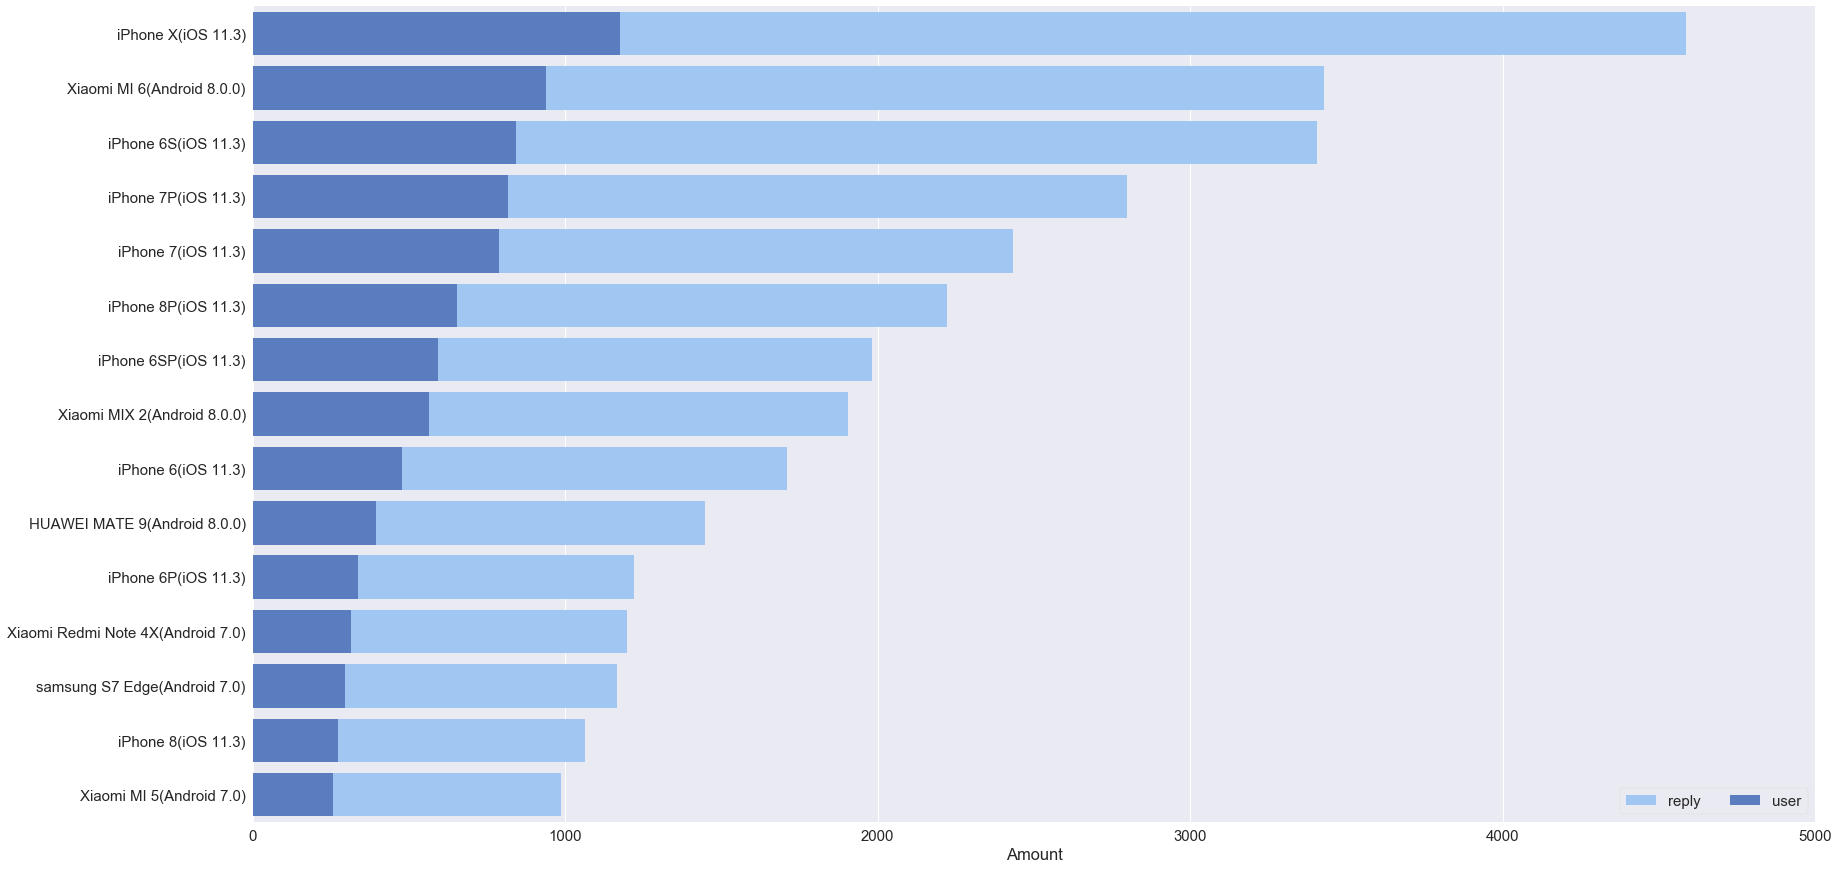

In [266]:
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="uid", y="device_cleaned", data=df.groupby('device_cleaned').agg({'uid':'count'}).reset_index().sort_values(by='uid',ascending=False)[:15],
            label=u"reply", color="b")
sns.set_color_codes("muted")
sns.barplot(x="uid", y="device_cleaned", data=df_device.groupby('device_cleaned').agg({'uid':'count'}).reset_index().sort_values(by='uid',ascending=False)[:15],
            label=u"user", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 5000), ylabel="",
       xlabel=u"Amount")
sns.despine(left=True, bottom=True)
plt.savefig("pie_device_uid.png", dpi=200)

In [ ]:
pie_chart(df_device[~df_device.brand.isnull()], 'brand')

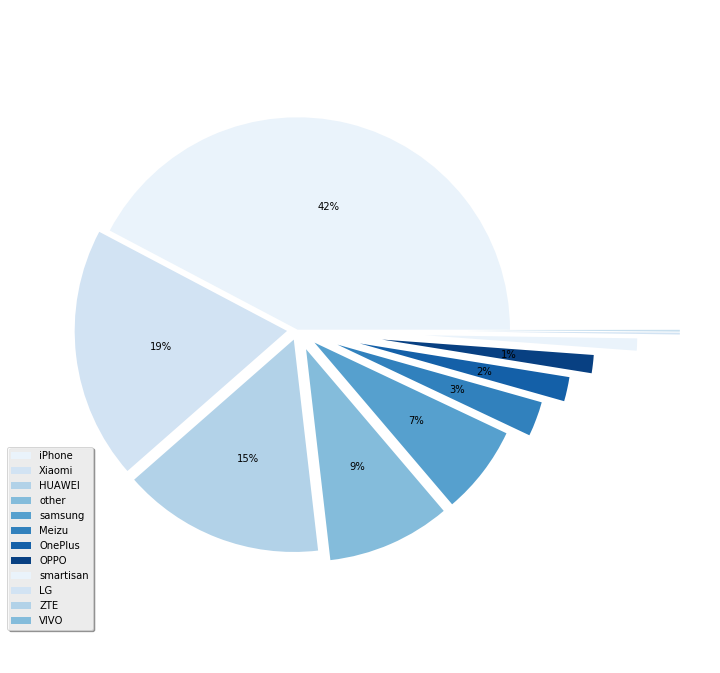

In [138]:
pie_chart(df[df.brand != 'NA'], 'brand')

# Wordcloud

In [305]:
stopwords = pd.read_csv(
"C:/Users/Leslie/Documents/Python Scripts/NGA_AC/stopword.txt", 
encoding='utf8', 
index_col=False,
quoting=3,
sep="\t"
)

In [306]:
segments = []
for w in df.content_cleaned.tolist():
    segs = jieba.cut(w)
    for seg in segs:
        if len(seg)>1:
            segments.append(seg);

In [307]:
segmentDF = pd.DataFrame({'segment':segments})
segmentDF = segmentDF[~segmentDF.segment.isin(stopwords[u'﻿stopword'])]
segStat = segmentDF.groupby(
by=["segment"]
)["segment"].agg({
"计数":np.size
}).reset_index().sort(
columns=["计数"],
ascending=False
);


C:\Users\Leslie\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


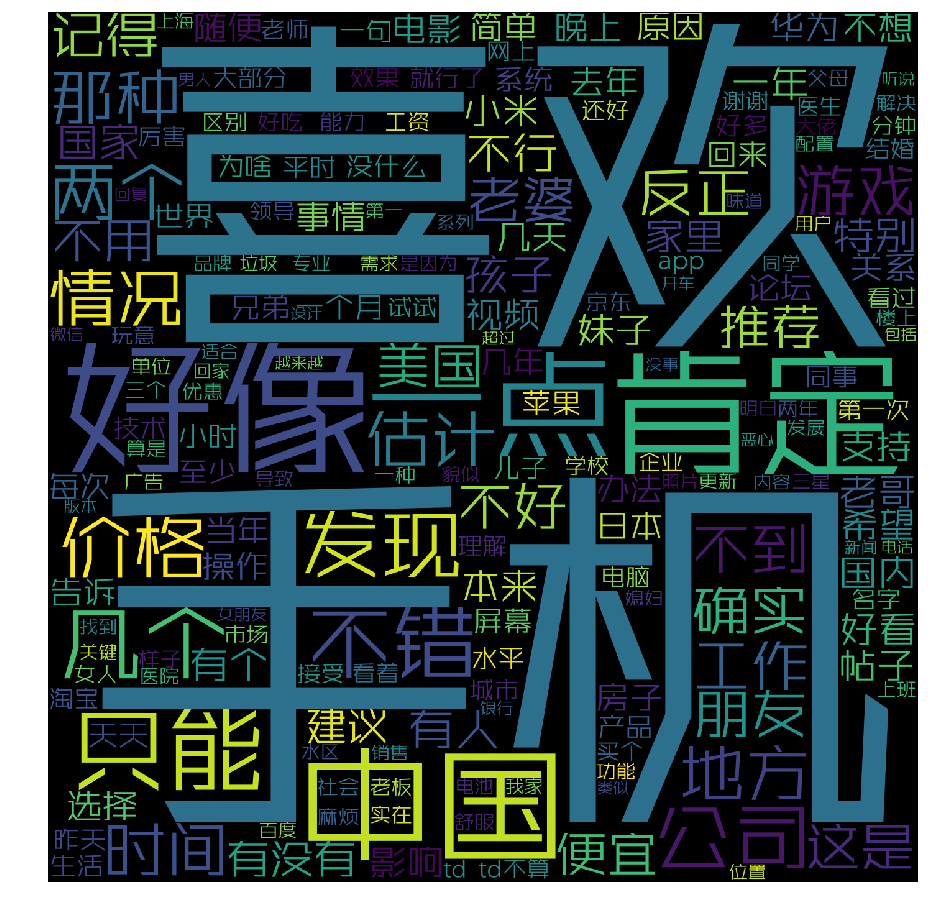

In [308]:
font = r'cu.ttf'
wordcloud = WordCloud(font_path=font,width=1400, height=1400, margin=2,prefer_horizontal=1).generate(' '.join(segmentDF.segment.tolist()))

# width,height,margin可以设置图片属性

# generate 可以对全部文本进行自动分词,但是他对中文支持不好,对中文的分词处理请看我的下一篇文章
#wordcloud = WordCloud(font_path = r'D:\Fonts\simkai.ttf').generate(f)
# 你可以通过font_path参数来设置字体集

#background_color参数为设置背景颜色,默认颜色为黑色

import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("filename.png", dpi=500)
plt.show()
